# Project: Wine Quality Investigation

## Table of Contents
<ul>

<li><a href="#intro">Introduction</a></li>
<li><a href="#Assessing">Data Assessing</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Visualization">Visualization</a></li>
</ul>



<a id='intro'></a>
## Introduction

> We're going to investigate this dataset on physicochemical properties and quality ratings of red and white wine samples.
>
### Data Set Information:
> The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).
>
> These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
>
### Attribute Information:
>Input variables (based on physicochemical tests):
> 1.  fixed acidity
> 2.  volatile acidity
> 3.  citric acid
> 4.  residual sugar
> 5.  chlorides
> 6.  free sulfur dioxide
> 7.  total sulfur dioxide
> 8.  density
> 9.  pH
> 10. sulphates
> 11. alcohol
>
>Output variable (based on sensory data):
>
> 12. quality (score between 0 and 10)

<a id='Assessing'></a>
## Assessing Data

In [106]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')

In [107]:
print(red_df.shape)
red_df.head()

(1599, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [108]:
print(white_df.shape)
white_df.head()

(4898, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [109]:
#features with missing values 
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [110]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [111]:
#duplicate rows in the white wine dataset
white_df.duplicated().sum()

937

In [112]:
#number of unique values in each dataset
red_df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [113]:
white_df.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [114]:
# number of unique values for 'quality' column 
red_df.quality.nunique()

6

In [115]:
white_df.quality.nunique()

7

In [116]:
#mean density of the red wine dataset
red_df.density.mean()

0.9967466791744833

> ### Appending Data
> 
> Combine the red and white datasets to make the analysis more efficient. Use NumPy to create a new column that preserves color information, and then use pandas to combine the dataframes. 

In [117]:
#Use pandas's rename funcition to change the 'total_sulfur-dioxide' column label to 'total_sulfur_dioxide' to avoid further append error
red_df.rename(columns={'total_sulfur-dioxide':'total_sulfur_dioside'}, inplace=True)

> Creae color columns
> 
> Create two arrays as long as the number of rows in the red and white dataframes that repeat the value "red" or "white". 

In [118]:
#create color array for red dataframe
color_red = np.repeat('red', red_df.shape[0])

##create color array for white dataframe
color_white = np.repeat('white', white_df.shape[0])

> Add arrays to the red and white dataframes. Do this by setting a new column called 'color' to the appropriate array. 

In [119]:
#Set new column 'color' to red dataframe
red_df['color'] = color_red
red_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [120]:
#Set new column 'color' to white datagrame
white_df['color'] = color_white
white_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

> Combine dataframes with Append

In [121]:
#Append dataframes
wine_df = red_df.append(white_df, sort=False)

#View dataframe to check for success
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

<a id='eda'></a>
## Exploratory Data Analysis

> ### Histograms for various Features

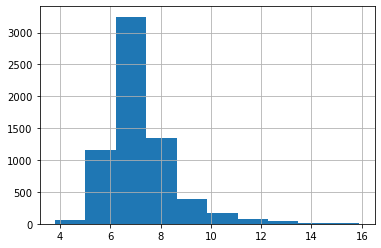

In [122]:
wine_df['fixed acidity'].hist();

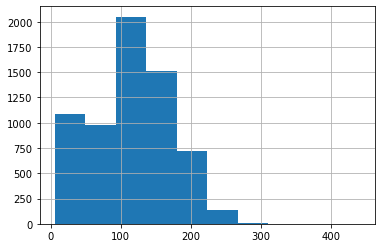

In [123]:
wine_df['total sulfur dioxide'].hist();

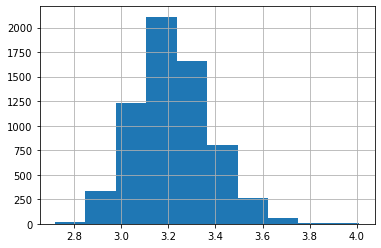

In [124]:
wine_df['pH'].hist();

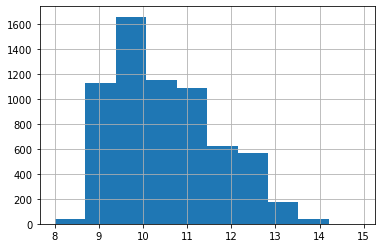

In [125]:
wine_df['alcohol'].hist();

> conclusion: based on histograms of columns in this dataset, Fixed Acidity and Alcohol feature variables appear skewed to the right. 

> ### Scatterplots of Quality against Various features

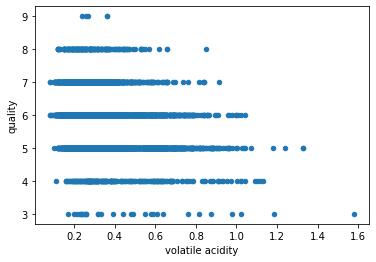

In [126]:
wine_df.plot(x='volatile acidity', y='quality', kind= 'scatter');

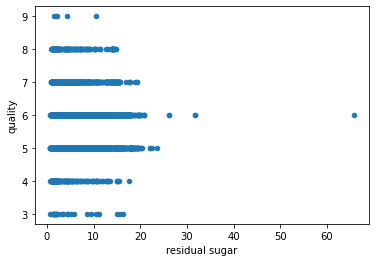

In [127]:
wine_df.plot(x='residual sugar', y='quality', kind= 'scatter');

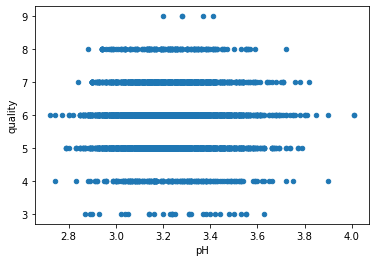

In [128]:
wine_df.plot(x='pH', y='quality', kind= 'scatter');

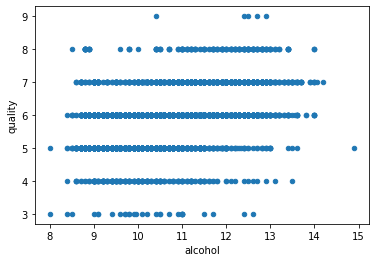

In [129]:
wine_df.plot(x='alcohol', y='quality', kind='scatter');

> Conclusion: based on scatterplots of quality afainst different feature variables, Alcohol is most likely to have a positive impact on quality. 

### Drawing Conslusions Using Groupby

### Is a certain type of wine associated with higher quality? 

> Compare the average quality of red wine with the average quality of white wine with groupby. To do this group by color and then find the mean quality of each group.

In [130]:
#Find the mean quality of each wine type (red and white) with groupby
wine_df.groupby('color')['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

> Conclusion: the mean quality of red wine is less than that of white wine. 

### What level of acidity (pH value) receives the highest average rating? 

> pH is a quantitative variable without clear categories, unlike color, which has ckear categories can group by )red and white). 
>
> I can create a categorical variable from a quantitative variable by creating my own categories. panda's cut function can "cut" data in groups. Using this, create a new column called "acidity level" with these categories: 
>
> 1. High: Lowest 25% of pH values
> 2. Moderately High: 25% - 50% of pH values
> 3. Medium: 50% - 75% of pH values
> 4. Low: 75% - max pH value

In [131]:
#View the min, 25%, 50%, 75%, max pH values with Pandas describe
wine_df.describe()['pH']

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [132]:
#Bin edges that will be used to "cut" the data into the groups 
bin_edges = [2.72,3.11,3.21,3.32,4.01]

In [133]:
#Labels for the four acidity level groups
bin_names = ['high','mod_high','medium','low']

In [134]:
#Create 'acidity_levels' column 
wine_df['acidity levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

#Check for successful creation of this column 
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color acidity levels  
0      9.4        5   red            low  
1      9.8        5   red       mod_high  
2      9.8        5   red         medium  
3      9.8        6   red       mod_high  
4      9.4        5   red            low

In [135]:
#Find the mean quality of each acidity level with groupby
wine_df.groupby('acidity levels')['quality'].mean()

acidity levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

> Conclusion: the Low level of acidity receives the highest eman quality rating.

### Drawing Conclusion Using Query

### Do wines with higher alcoholic content receive better rating? 
>
> Use query to create two groups of wine samples: 
>
> 1. Low alcohol (samples with an alcohol content less than the median)
> 2. High alcohol (samples with an alcohol content greater than or equal to the median)
> 
> Then, find the mean quality rating of each group.

In [136]:
#Get the median amount of alcohol content
wine_df.median()['alcohol']

10.3

In [137]:
#Select samples with alcohol content less than the median
low_alcohol = wine_df.query('alcohol < 10.3')

#Select samples wirh alcohol content greater than or equal to the median
high_alcohol = wine_df.query('alcohol >= 10.3')

#Ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count()#should be True

True

In [138]:
#Get mean quality rating for the low alcohol and high alcohol groups 
low_alcohol.mean()['quality'], high_alcohol.mean()['quality']

(5.475920679886686, 6.146084337349397)

> Conclusion: the wine with highter alcoholic content generally receive better ratings. 

<a id='Visualization'></a>
## Plotting with Matplotlib

> I will create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. 

In [143]:
#Use query to select each group and get its mean quality
median = wine_df['alcohol'].median()
low = wine_df.query('alcohol < {}'.format(median))
high = wine_df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

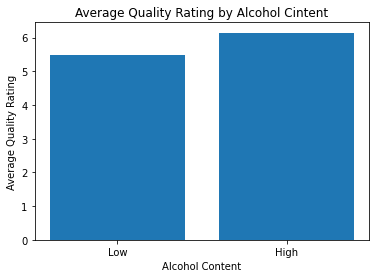

In [144]:
#Create a bar chart with proper labels
locations = [1,2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low','High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Rating by Alcohol Cintent')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');